In [1]:
import matplotlib.pyplot as plt
plt.style.use("fast")
%config InlineBackend.figure_format='svg'

In [2]:
import numpy as np
import pygimli as pg
from pygimli import meshtools as mt # import a module 
from pygimli.viewer import showMesh # import a function

ERROR! Session/line number was not unique in database. History logging moved to new session 7


In [3]:
left = -1000
right = 1000
depth = 2000

In [4]:
X = 19500
Y = 45000

In [5]:
world = mt.createWorld(start=[left, depth/2], end=[right, -depth/2], worldMarker=False)

In [6]:
circle = mt.createCircle(pos=(0, 80), radius=20, marker=2, boundaryMarker=5, nSegments=60)

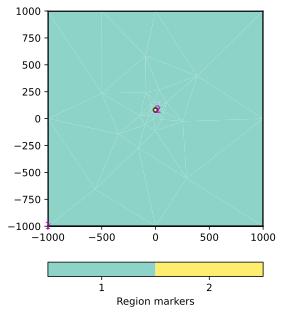

In [7]:
geometry = world + circle
pg.show(geometry);

In [8]:
mesh = mt.createMesh(geometry, area=5000, quality=33, smooth=True)
mesh = mesh.createP2()

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x13ab359d0>)

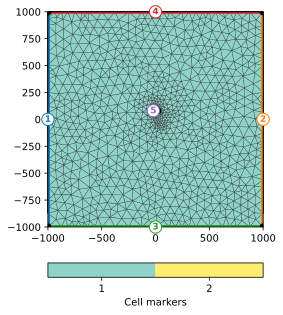

In [9]:
showMesh(mesh, boundaryMarkers=True, markers=True, showMesh=True)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x13f0751d0>)

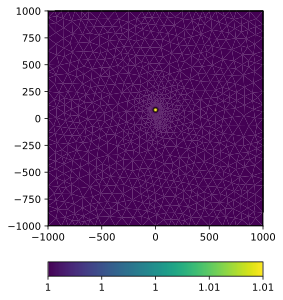

In [10]:
amap = [[1, 1], [2, 1.01]]
showMesh(mesh, amap)

In [11]:
def BC(boundary):
    # return (-X * boundary.nodes()[0][0] -Y * boundary.nodes()[0][1])
    return -boundary.norm().dot([X, Y])
    # return (-X * boundary.center()[0] - Y * boundary.center()[1])

bcNeumann={'Neumann': {1: BC,
                  2: BC,
                  3: BC,
                  4: BC}}

In [12]:
def BCN(node):
    return (-X * node.x() -Y * node.y())
    
bc={'Node': [[b.node(0).id(), BCN(b.node(0))] for b in mesh.findBoundaryByMarker(1,5)]}

Potential:

$$
u(x,y,z) = X x + Y y + Z z + d
$$

$$
\mathbf B := \nabla u = (X, Y, Z)^\top
$$

In [13]:

u = pg.solve(mesh, a=amap, bc=bcNeumann, verbose=True)

15/03/24 - 17:56:27 - pyGIMLi - INFO - Fixing pure Neumann boundary condition by forcing: intDomain(u, mesh) = 0
15/03/24 - 17:56:27 - pyGIMLi - WARNING - BlockMatrix add (transpose==True) ... Move me to core


Mesh:  Mesh: Nodes: 5122 Cells: 2515 Boundaries: 3818
Assembling time:  0.017932375
Solving time:  0.099638208


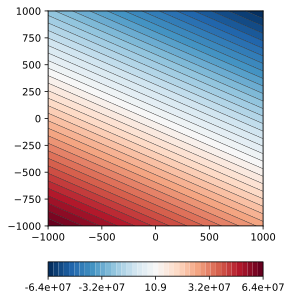

In [14]:
showMesh(mesh, data=u, showMesh=True, contourLines=False, nCols=41, cMap='RdBu_r');

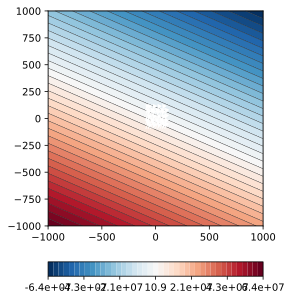

In [15]:
from pygimli.viewer.mpl import drawStreams
ax, _ = showMesh(mesh, data=u, nCols=41, nLevs=7, contourLines=False, showMesh=True, cMap='RdBu_r')
gridcoarse = pg.createGrid(x=np.linspace(-99, 99, 10),
                           y=np.linspace(-99, 99, 10))
drawStreams(ax, mesh, pg.solver.grad(mesh, u), startStream=2, coarseMesh=gridcoarse, color='white')

In [16]:
# uhom = pg.Vector(list(map(lambda p__: -p__ * 48000, mesh.positions()[:, 0])))

uhom = pg.Vector(
    list(
        map(
            lambda x, y: -x * X - y * Y, mesh.positions()[:, 0], mesh.positions()[:, 1]))) 

In [22]:
x = np.arange(-500, 500, 1)
z = np.zeros_like(x)

B = -pg.solver.grad(mesh, u)
posVec = [pg.Pos(pos) for pos in zip(x, z)]
resMesh = pg.interpolate(srcMesh=mesh, 
                         inVec=B[:, 1], destPos=posVec)

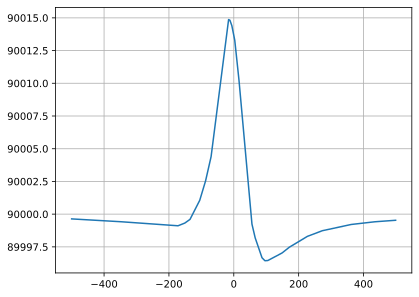

In [23]:
fig, ax = plt.subplots()
ax.plot(x, resMesh + Y)
ax.grid(True)

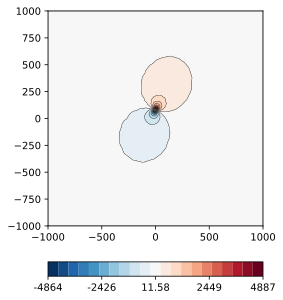

In [24]:
showMesh(mesh, data=(u - uhom), showMesh=True, nCols=21, contourLines=False, cMap='RdBu_r');

In [25]:
#showMesh(mesh, data=B, 
#         showMesh=False, cMap='RdBu_r');

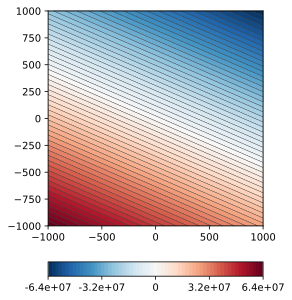

In [26]:
showMesh(mesh, data=uhom, 
         showMesh=True, nCols=61, contourLines=False, cMap='RdBu_r');